## 1. K√ºt√ºphaneleri ve Mod√ºlleri ƒ∞√ße Aktarma

A≈üaƒüƒ±daki satƒ±rlar, projenizde kullanacaƒüƒ±nƒ±z temel i≈ülevsellikleri saƒülayacak Python k√ºt√ºphanelerini i√ße aktarƒ±r:

```python
import os
````

* **os**: ƒ∞≈ületim sistemiyle etkile≈üim kurmak i√ßin (dosya/dizin i≈ülemleri, ortam deƒüi≈ükenleri vb.).

```python
# Random Module
import random
```

* **random**: Rastgele sayƒ± ve se√ßim i≈ülemleri yapmak i√ßin.

```python
# Data manipulation and linear algebra
import numpy as np
import pandas as pd
```

* **numpy (np)**: Y√ºksek performanslƒ± √ßok boyutlu dizi (array) i≈ülemleri ve lineer cebir fonksiyonlarƒ±.
* **pandas (pd)**: Veri y√ºkleme, temizleme ve analiz i√ßin DataFrame yapƒ±sƒ±.

```python
# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2
```

* **matplotlib.pyplot (plt)**: Grafik √ßizimleri (√ßizgi grafiƒüi, histogram, scatter, vb.).
* **matplotlib.image (mpimage)**: G√∂r√ºnt√º dosyalarƒ±nƒ± okuyup g√∂stermeye yarar.
* **cv2**: OpenCV k√ºt√ºphanesi; g√∂r√ºnt√º i≈üleme ve bilgisayarlƒ± g√∂r√º fonksiyonlarƒ± i√ßin.

```python
# Neural network API
import tensorflow as tf
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    array_to_img,
    img_to_array,
    load_img
)
```

* **tensorflow (tf)**: Derin √∂ƒürenme modellerini tanƒ±mlamak ve eƒüitmek i√ßin Google‚Äôƒ±n geli≈ütirdiƒüi API.
* **ImageDataGenerator**: G√∂r√ºnt√ºleri ger√ßek zamanlƒ± olarak augmentasyon (√ße≈üitleme) ve besleme i√ßin.
* **array\_to\_img, img\_to\_array, load\_img**:

  * `load_img()`: Diskten g√∂r√ºnt√º dosyasƒ±nƒ± okur.
  * `img_to_array()`: PIL veya benzeri bir g√∂r√ºnt√ºy√º NumPy dizisine √ßevirir.
  * `array_to_img()`: Tersi y√∂nde NumPy dizisini g√∂r√ºnt√º objesine d√∂n√º≈üt√ºr√ºr.

```python
from sklearn.model_selection import train_test_split
```

* **train\_test\_split**: Veri setini eƒüitim ve test (ve/veya doƒürulama) olarak rastgele ayƒ±rmak i√ßin.

---

Bu ilk adƒ±m, veri y√ºkleme, i≈üleme, g√∂rselle≈ütirme ve model eƒüitimi i√ßin gerekli t√ºm temel k√ºt√ºphaneleri hazƒ±rlar. Bir sonraki adƒ±mda bu k√ºt√ºphanelerin nasƒ±l kullanƒ±lacaƒüƒ±na dair √∂rnek kodlarla ilerleyeceƒüiz.


In [2]:
import os

# Random Module
import random

# Data manipulation and linear algebra
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2

# Neural network API
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.model_selection import train_test_split

## 2. G√∂r√ºnt√ºleri Y√ºkleme ve √ñn ƒ∞≈üleme

- **`save_images(path_dir)` fonksiyonu**  
  1. `os.listdir` ile klas√∂rdeki dosya isimlerini alƒ±r.  
  2. Her bir dosyayƒ± `cv2.imread` ile BGR formatƒ±nda okur.  
  3. `cv2.cvtColor` ile BGR ‚Üí RGB d√∂n√º≈ü√ºm√º yapar.  
  4. `cv2.resize` ile her g√∂r√ºnt√ºy√º 200√ó200 piksele sabitler.  
  5. ƒ∞≈ülenen g√∂r√ºnt√ºleri bir listeye ekler ve en sonunda `np.asarray` ile NumPy dizisine √ßevirir.

- **Colab √ºzerinde klas√∂r yapƒ±sƒ±nƒ±n olu≈üturulmasƒ±**  
  - `mkdir -p` komutu Train ve Test altƒ±nda d√∂rt ayrƒ± hasta sƒ±nƒ±fƒ± (cataract, glaucoma, diabetic_retinopathy, normal) i√ßin gerekli alt klas√∂rleri bir kerede olu≈üturur.

- **Veri setinin y√ºklenmesi**  
  - `dataset_dir` i√ßindeki her bir alt klas√∂rden (`'cataract'`, `'glaucoma'`, ‚Ä¶) `save_images` √ßaƒürƒ±larak i≈ülenmi≈ü g√∂r√ºnt√ºler elde edilir.

- **T√ºm g√∂r√ºnt√ºlerin birle≈ütirilmesi**  
  - `np.concatenate` ile d√∂rt sƒ±nƒ±fa ait g√∂r√ºnt√º dizileri tek bir `eye_diseases_img` dizisinde toplanƒ±r.

- **Etiket dizisinin olu≈üturulmasƒ±**  
  - `np.repeat` ile her sƒ±nƒ±f i√ßin sabit bir tamsayƒ± (0,1,2,3) tekrarlanarak `label_eye_diseases` dizisi olu≈üturulur.  
  - Bu sayede her g√∂r√ºnt√ºn√ºn kar≈üƒ±sƒ±na doƒüru sƒ±nƒ±f etiketi yerle≈ütirilmi≈ü olur.

- **Etiket‚Äìsƒ±nƒ±f adƒ± e≈ülemesi**  
  - `{0: 'cataract', 1: 'glaucoma', 2: 'diabetic_retinopathy', 3: 'normal'}` s√∂zl√ºƒü√º, model √ßƒ±ktƒ±larƒ±nƒ± anla≈üƒ±lƒ±r isimlerle e≈ülemek i√ßin kullanƒ±lƒ±r.

---

Bu sayede elinizde:

1. Sabit boyutlu ve RGB formatƒ±ndaki g√∂r√ºnt√º dizisi (`eye_diseases_img`)  
2. Kar≈üƒ±lƒ±k gelen etiket dizisi (`label_eye_diseases`)  
3. Etiket‚Äìisim e≈ülemesi (`dict_labels_eye_diseases`)  

hazƒ±r hale gelmi≈ü oldu. Bundan sonra bu verileri eƒüitim/test setlerine b√∂l√ºp modele besleyebiliriz.


In [ ]:
import os
import cv2
import numpy as np

def save_images(path_dir):
    images = []
    for jpg in os.listdir(path_dir):
        img_path = os.path.join(path_dir, jpg)
        image_high_resolution = cv2.imread(img_path)
        image_change_color = cv2.cvtColor(image_high_resolution, cv2.COLOR_BGR2RGB)
        image_low_resolution = cv2.resize(image_change_color, (200, 200))
        images.append(image_low_resolution)
    return np.asarray(images)

!mkdir -p /content/drive/MyDrive/model/Train/cataract /content/drive/MyDrive/model/Train/glaucoma \
            /content/drive/MyDrive//model/Train/diabetic_retinopathy /content/drive/MyDrive/model/Train/normal
!mkdir -p /content/drive/MyDrive/model/Test/cataract  /content/drive/MyDrive/model/Test/glaucoma \
            /content/drive/MyDrive/model/Test/diabetic_retinopathy  /content/drive/MyDrive/model/Test/normal

# Dataset‚Äôin olduƒüu ana dizin
dataset_dir = '/content/drive/MyDrive/dataset'

# G√∂rselleri y√ºkle
cataract_img = save_images(os.path.join(dataset_dir, 'cataract'))
glaucoma_img = save_images(os.path.join(dataset_dir, 'glaucoma'))
diabetic_retinopathy_img = save_images(os.path.join(dataset_dir, 'diabetic_retinopathy'))
normal_img = save_images(os.path.join(dataset_dir, 'normal'))

# Hepsini bir araya getir
eye_diseases_img = np.concatenate((
    cataract_img,
    glaucoma_img,
    diabetic_retinopathy_img,
    normal_img
))

label_eye_diseases = np.concatenate((
    np.repeat(0, cataract_img.shape[0]),            # Cataract etiketleri
    np.repeat(1, glaucoma_img.shape[0]),            # Glaucoma etiketleri
    np.repeat(2, diabetic_retinopathy_img.shape[0]),# Diabetic Retinopathy etiketleri
    np.repeat(3, normal_img.shape[0])               # Normal etiketleri
))

# Label ‚Äì isim e≈ülemesi
dict_labels_eye_diseases = {
    0: 'cataract',
    1: 'glaucoma',
    2: 'diabetic_retinopathy',
    3: 'normal'
}


## 3. Veri Boyutunu ƒ∞nceleme

- **`eye_diseases_img.shape`** d√∂rt elemanlƒ± bir tuple d√∂nd√ºr√ºr:  
  1. `shape[0]` ‚Üí Toplam g√∂r√ºnt√º sayƒ±sƒ±  
  2. `shape[1]` ‚Üí G√∂r√ºnt√º y√ºksekliƒüi (piksel)  
  3. `shape[2]` ‚Üí G√∂r√ºnt√º geni≈üliƒüi (piksel)  
  4. `shape[3]` ‚Üí Renk kanalƒ± sayƒ±sƒ± (RGB i√ßin 3)

- **F-string kullanƒ±mƒ±**  
  ```python
  print(f'''Total number of images: {eye_diseases_img.shape[0]}
          Resolution: {eye_diseases_img.shape[1]} x {eye_diseases_img.shape[2]}
          Channels of Color: {eye_diseases_img.shape[3]} (RGB)''')


In [7]:
print(f'''Total number of images: {eye_diseases_img.shape[0]}
        Resolution: {eye_diseases_img.shape[1]} x {eye_diseases_img.shape[2]}
        Channels of Color: {eye_diseases_img.shape[3]} (RGB)''')


Total number of images: 4217
        Resolution: 200 x 200
        Channels of Color: 3 (RGB)


## 4. Veri Setini B√∂lme, Kaydetme ve DataGenerator Ayarlarƒ±

- **Veri setini eƒüitim/test olarak ayƒ±rma**  
  - `train_test_split` ile verinin %70‚Äôi eƒüitim, %30‚Äôu test olarak ayrƒ±ldƒ±.  
  - `random_state=2184` ile b√∂lme her √ßalƒ±≈ütƒ±rmada aynƒ± sonucu verir.

- **G√∂r√ºnt√ºleri klas√∂rlere kaydetme fonksiyonu**  
  - `save_images_directories(x, y, dir_set)` her bir g√∂r√ºnt√ºy√º  
    - etikete kar≈üƒ±lƒ±k gelen alt klas√∂re  
    - rastgele isimle (`np.random.randint(1e6)`)  
    - JPEG formatƒ±nda (`plt.imsave`) kaydeder.

- **Train/Test klas√∂rlerine kaydetme**  
  - `x_train, y_train` ‚Üí `/model/Train`  
  - `x_test,  y_test`  ‚Üí `/model/Test`

- **ImageDataGenerator ile √∂l√ßekleme ve augmentasyon**  
  - `rescale=1/255` ‚Üí Piksel deƒüerlerini [0,1] aralƒ±ƒüƒ±na d√∂n√º≈üt√ºr√ºr.  
  - `horizontal_flip=True` ‚Üí Yatay √ßevirme ile veri √ße≈üitliliƒüi.  
  - `validation_split=0.2` (sadece test_datagen‚Äôda) ‚Üí Test dizininden %20‚Äôsini doƒürulama i√ßin ayƒ±rƒ±r.

- **flow_from_directory ile jenerat√∂r olu≈üturma**  
  - **Eƒüitim**  
    - Klas√∂r: `/model/Train`  
    - `subset='training'`  
    - Batch size: 128  
    - √áƒ±ktƒ±: 2950 resim, 4 sƒ±nƒ±f  
  - **Doƒürulama**  
    - Klas√∂r: `/model/Test`  
    - `subset='validation'`  
    - Batch size: 128  
    - √áƒ±ktƒ±: 252 resim, 4 sƒ±nƒ±f  
  - **Test**  
    - Klas√∂r: `/model/Test`  
    - `subset` kullanƒ±lmaz  
    - Batch size: 128  
    - √áƒ±ktƒ±: 1266 resim, 4 sƒ±nƒ±f

- **Sƒ±nƒ±f isimlerinin listelenmesi**  
  - `classes = list(dict_labels_eye_diseases.values())`  
  - Sonu√ß: `['cataract', 'glaucoma', 'diabetic_retinopathy', 'normal']`  

---

Bu adƒ±mda:
1. Ham NumPy dizilerini klas√∂rlere d√∂n√º≈üt√ºrd√ºk.  
2. `ImageDataGenerator` ile √∂l√ßekleme ve basit augmentasyon ekledik.  
3. `flow_from_directory` ile model eƒüitimi ve deƒüerlendirmesi i√ßin hazƒ±r jenerat√∂rler olu≈üturduk.  


In [8]:
x_train, x_test, y_train, y_test = train_test_split(eye_diseases_img, label_eye_diseases,
                                                    test_size=0.30,
                                                   random_state=2184,
                                                   )

In [10]:
def save_images_directories(x, y, dir_set):
    for i in range(x.shape[0]):
        plt.imsave(f'{dir_set}/{dict_labels_eye_diseases[y[i]]}/{np.random.randint(1000000)}.jpg', x[i]) # Directorie where the image is going to be save, the array

save_images_directories(x_train, y_train, '/content/drive/MyDrive/model/Train')
save_images_directories(x_test,  y_test,  '/content/drive/MyDrive/model/Test')


In [11]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip=True,
                                  vertical_flip=False)

test_datagen = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  validation_split=0.2)

In [53]:
print('Training Dataset:')
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/model/Train',
    target_size=(200,200),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

print('Validation Dataset:')
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/model/Test',
    target_size=(200,200),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation'
)

print('Test Dataset:')
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/model/Test',
    target_size=(200,200),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb'
)

Training Dataset:
Found 2950 images belonging to 4 classes.
Validation Dataset:
Found 252 images belonging to 4 classes.
Test Dataset:
Found 1266 images belonging to 4 classes.


In [14]:
# Save the classes in a list
classes = list(dict_labels_eye_diseases.values())

## 5. Eƒüitim Sonu√ßlarƒ±nƒ± G√∂rselle≈ütirme Fonksiyonu

**`results_visualization_fancy(history)`** fonksiyonu, Keras‚Äôƒ±n eƒüitim ge√ßmi≈üini alƒ±p hem doƒüruluk (accuracy) hem de kayƒ±p (loss) metriklerini ≈üƒ±k grafiklerle √∂zetler:

1. **Epoch Sayƒ±larƒ±nƒ± Belirleme**  
   - `total_epochs`: Modeli fit ederken planlanan maksimum epoch sayƒ±sƒ± (`history.params['epochs']`).  
   - `run_epochs`: Ger√ßekten √ßalƒ±≈ütƒ±rƒ±lan epoch sayƒ±sƒ± (`len(history.history['accuracy'])`).  
   - Eƒüer erken durdurma (`EarlyStopping`) kullanƒ±ldƒ±ysa, `run_epochs < total_epochs` olur.

2. **Metrik Dizilerini √áƒ±karma**  
   - `train_acc`, `val_acc`: Eƒüitim ve doƒürulama doƒüruluk deƒüerleri.  
   - `train_loss`, `val_loss`: Eƒüitim ve doƒürulama kayƒ±p deƒüerleri.  
   - `epochs = range(1, run_epochs+1)`: X ekseni i√ßin epoch numaralarƒ±.

3. **Doƒüruluk Grafiƒüi (Accuracy Plot)**  
   - Noktalar ve √ßizgiler:
     - Eƒüitim: d√ºz √ßizgi (`-`), yuvarlak marker (`o`)  
     - Doƒürulama: kesikli √ßizgi (`--`), kare marker (`s`)  
   - Marker‚Äôlar i√ßi beyaz, kenar kalƒ±nlƒ±ƒüƒ± ayarlƒ± ‚Üí okunabilirlik artar.  
   - Erken durdurma varsa, `plt.axvline` ile dikey bir kesikli √ßizgi ve etiket eklenir (`Early Stop @run_epochs`).  
   - Eksenler 1‚Äôden `total_epochs`‚Äôa, doƒüruluk 0‚Äì1 aralƒ±ƒüƒ±na kilitlenir.

4. **Kayƒ±p Grafiƒüi (Loss Plot)**  
   - Benzer stil:
     - Eƒüitim: d√ºz √ßizgi, √º√ßgen marker (`^`)  
     - Doƒürulama: kesikli √ßizgi, √ßarpƒ± marker (`x`)  
   - Erken durdurma √ßizgisi tekrar √ßizilir.  
   - Y ekseni otomatik ayarlanƒ±r (loss i√ßin).

5. **Grafik Ayarlarƒ±**  
   - `figsize=(8,6)`: Yeterli b√ºy√ºkl√ºkte fig√ºr.  
   - `grid(alpha=0.3)`: Hafif ƒ±zgara √ßizgileri.  
   - Ba≈ülƒ±k, eksen etiketleri ve lejant ile okunabilirlik saƒülanƒ±r.  
   - `plt.show()` ile her grafik ayrƒ± pencerede g√∂r√ºnt√ºlenir.

---

**Kullanƒ±m √ñrneƒüi:**  
```python
history = model.fit(‚Ä¶)
results_visualization_fancy(history)


In [58]:
import matplotlib.pyplot as plt

def results_visualization_fancy(history):
    # 1) Fit sƒ±rasƒ±nda ka√ß epoch planladƒ±ƒüƒ±mƒ±za bakalƒ±m
    total_epochs = history.params.get('epochs', len(history.history['accuracy']))
    # 2) Ger√ßek kaydedilmi≈ü (√ßalƒ±≈ütƒ±rƒ±lmƒ±≈ü) epoch sayƒ±sƒ±
    run_epochs   = len(history.history['accuracy'])

    epochs = range(1, run_epochs + 1)
    train_acc  = history.history['accuracy']
    val_acc    = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss   = history.history['val_loss']

    # ‚Äî Accuracy grafiƒüi ‚Äî
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, linestyle='-',  marker='o', markersize=6,
             markerfacecolor='white', markeredgewidth=1.5, label='Train Acc')
    plt.plot(epochs, val_acc,   linestyle='--', marker='s', markersize=6,
             markerfacecolor='white', markeredgewidth=1.5, label='Val Acc')

    # Eƒüer erken durdurma olduysa, o epoch'ta bir √ßizgi √ßekelim
    if run_epochs < total_epochs:
        plt.axvline(run_epochs, color='grey', linestyle='--',
                    label=f'Early Stop @ {run_epochs}')

    # Ekseni 1‚Äôden planlanan epoch‚Äôa kadar a√ß
    plt.xlim(1, total_epochs)
    plt.ylim(0,1)
    plt.title('Eƒüitim ve Doƒürulama Doƒüruluƒüu', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

    # ‚Äî Loss grafiƒüi ‚Äî
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_loss, linestyle='-',  marker='^', markersize=6,
             markerfacecolor='white', markeredgewidth=1.5, label='Train Loss')
    plt.plot(epochs, val_loss,   linestyle='--', marker='x', markersize=7,
             markeredgewidth=2, label='Val Loss')

    if run_epochs < total_epochs:
        plt.axvline(run_epochs, color='grey', linestyle='--')

    plt.xlim(1, total_epochs)
    plt.title('Eƒüitim ve Doƒürulama Kayƒ±bƒ±', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()


## 6. ModelCheckpoint ve √ñzel Eƒüitim Callback‚Äôleri

- **`!mkdir -p /content/results`**  
  - Kaydedilecek model dosyalarƒ±nƒ±n yolu olarak kullanƒ±lan `/content/results` klas√∂r√ºn√ºn varlƒ±ƒüƒ±nƒ± saƒülar.

- **`callback_best_model(name_version_model)`**  
  - `tf.keras.callbacks.ModelCheckpoint` d√∂nd√ºr√ºr.  
    - `filepath`: `/content/results/{name_version_model}`  
    - `save_best_only=True`: Sadece izlenen metriƒüe g√∂re (√∂rneƒüin `val_accuracy`) en iyi performans g√∂steren aƒüƒ±rlƒ±klarƒ± saklar.  
    - `monitor='val_accuracy'`: Doƒürulama doƒüruluƒüunu izler.  
    - `verbose=1`: Model kaydƒ± sƒ±rasƒ±nda konsola bilgi yazdƒ±rƒ±r.  
    - `save_freq='epoch'`: Her epoch sonunda kaydetme kontrol√º yapar.

- **`TrainingCallback` sƒ±nƒ±fƒ±**  
  - `tf.keras.callbacks.Callback`‚Äôten t√ºretilir.  
  - `on_epoch_end(self, epoch, logs={})` her epoch sonunda √ßalƒ±≈üƒ±r.  
    - `logs.get('accuracy')` ile o epoch‚Äôun eƒüitim doƒüruluƒüunu alƒ±r.  
    - Eƒüer doƒüruluk `> 0.90` ise:  
      - Konsola `"The model has reached the accuracy desired (0.90), stop the training!"` mesajƒ± basar.  
      - `self.model.stop_training = True` ile eƒüitimi erkenden durdurur.

---

Bu callback‚Äôleri eƒüitim sƒ±rasƒ±nda ≈ü√∂yle kullanabilirsiniz:

```python
model.fit(
    ..., 
    callbacks=[
        callback_best_model('my_model.h5'),
        TrainingCallback()
    ]
)


In [ ]:
from tensorflow.keras.callbacks import Callback

!mkdir -p /content/results

def callback_best_model(name_version_model):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=f'/content/results/{name_version_model}',
        save_best_only=True,
        monitor='val_accuracy',
        verbose=1,
        save_freq='epoch'    
    )


class TrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') > 0.90:
            print('The model has reached the accuracy desired (0.90), stop the training!')
            self.model.stop_training = True

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## 7. Basit Tam Baƒülantƒ±lƒ± (MLP) Model Tanƒ±mƒ± ve Derleme

- **Uyarƒ± Filtreleme**  
  - `warnings.filterwarnings("ignore")`  
    TensorFlow ve diƒüer k√ºt√ºphane uyarƒ±larƒ±nƒ± gizleyerek temiz √ßƒ±ktƒ± saƒülar.

- **Model Mimarisi**  
  1. **Flatten (Giri≈ü Katmanƒ±)**  
     - `input_shape=(200,200,3)`  
     - 200√ó200 RGB g√∂r√ºnt√ºy√º tek boyutlu 120.000 elemanlƒ± vekt√∂re √ßevirir.  
     - **Parametre**: 0  
  2. **Gizli Katman 1**  
     - `Dense(50, activation='relu')`  
     - 50 n√∂ron, ReLU aktivasyonu.  
     - **Parametre**: 120 000√ó50 + 50 = 6 000 050  
  3. **Gizli Katman 2**  
     - `Dense(100, activation='relu')`  
     - 100 n√∂ron, ReLU aktivasyonu.  
     - **Parametre**: 50√ó100 + 100 = 5 100  
  4. **√áƒ±kƒ±≈ü Katmanƒ±**  
     - `Dense(4, activation='softmax')`  
     - 4 sƒ±nƒ±f i√ßin softmax aktivasyonu.  
     - **Parametre**: 100√ó4 + 4 = 404  

- **Model √ñzeti**  
  - **Toplam Parametre**: 6 005 554 (t√ºm√º eƒüitilebilir)  

- **Compile A≈üamasƒ±**  
  - `optimizer='adam'`  
    Adaptif √∂ƒürenme oranlƒ± Adam optimizasyonu.  
  - `loss='categorical_crossentropy'`  
    √áok sƒ±nƒ±flƒ± sƒ±nƒ±flandƒ±rma i√ßin uygun kayƒ±p fonksiyonu.  
  - `metrics=['accuracy']`  
    Eƒüitim ve doƒürulama doƒü¬≠ru¬≠lu¬≠ƒüu takibi.

> **Not:** Bu MLP yapƒ±sƒ± bir ‚Äúbaseline‚Äù sunar. G√∂r√ºnt√º verisinde daha iyi sonu√ß i√ßin konvol√ºsyonel katmanlar (CNN) eklemeyi d√º≈ü√ºnebilirsiniz.  


In [20]:
model_base = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Flatten(input_shape=(200,200,3)),

    # Layer 1
    tf.keras.layers.Dense(50, activation='relu'),

    # Layer 2
    tf.keras.layers.Dense(100, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(4, activation='softmax')
]
)
model_base.summary()

# Compile the model with the require settings
model_base.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten (Flatten)               ‚îÇ (None, 120000)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 50)             ‚îÇ     6,000,050 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 100)            ‚îÇ         5,100 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 4)              ‚îÇ           404 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 6,005,554 (22.91 MB)

 Trainable params: 6,005,554 (22.91 MB)

 Non-trainable params: 0 (0.00 B)

## 8. Model Eƒüitimi, Deƒüerlendirme ve Sonu√ß G√∂rselle≈ütirmesi

- **Eƒüitim**  
  - `model_base.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[callback_best_model('simple_model.h5')])` ile model 50 epoch boyunca eƒüitildi.  
  - Son epoch sonu√ßlarƒ±:  
    - Eƒüitim doƒüruluƒüu ‚âà 79.6%  
    - Doƒürulama doƒüruluƒüu ‚âà 75.4%  
  - `ModelCheckpoint` yalnƒ±zca `val_accuracy` iyile≈ütiƒüinde en iyi aƒüƒ±rlƒ±klarƒ± `/content/results/simple_model.h5`‚Äôe kaydetti.

- **Test Seti Deƒüerlendirmesi**  
  - `model_base.evaluate(test_generator)` ile model test verisinde:  
    - Test doƒüruluƒüu ‚âà 76.3%  
    - Test kaybƒ± ‚âà 0.58

- **Sonu√ßlarƒ±n G√∂rselle≈ütirilmesi**  
  - `results_visualization_fancy(history)` fonksiyonu, epoch bazlƒ±:  
    - Eƒüitim ve doƒürulama doƒüruluk  
    - Eƒüitim ve doƒürulama kayƒ±p  
    grafiklerini √ßizdi.  
  - Erken durdurma (early stopping) ya da overfitting belirtileri varsa dikey √ßizgiyle i≈üaretledi,  
  - B√∂ylece hem sayƒ±sal hem de grafiksel olarak model performansƒ±nƒ± hƒ±zlƒ±ca deƒüerlendirdiniz.  


In [21]:
history = model_base.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callback_best_model('simple_model.h5')]
)

Epoch 1/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 352ms/step - accuracy: 0.3056 - loss: 10.2096
Epoch 1: val_accuracy improved from -inf to 0.56349, saving model to /content/results/simple_model.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 517ms/step - accuracy: 0.3079 - loss: 10.0802 - val_accuracy: 0.5635 - val_loss: 2.2304
Epoch 2/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 350ms/step - accuracy: 0.4971 - loss: 1.8466
Epoch 2: val_accuracy did not improve from 0.56349
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 386ms/step - accuracy: 0.4977 - loss: 1.8348 - val_accuracy: 0.5238 - val_loss: 1.2233
Epoch 3/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 355ms/step - accuracy: 0.5432 - loss: 1.0934
Epoch 3: val_accuracy did not improve from 0.56349
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 387ms/step - accuracy: 0.5440 - loss: 1.0932 - val_accuracy: 0.5159 - val_loss: 1.0542
Epoch 4/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 339ms/step - accuracy: 0.6274 - loss: 0.8538
Epoch 4: val_accuracy improved from 0.56349 to 

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 378ms/step - accuracy: 0.6277 - loss: 0.8528 - val_accuracy: 0.7143 - val_loss: 0.7027
Epoch 5/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 340ms/step - accuracy: 0.6885 - loss: 0.7415
Epoch 5: val_accuracy did not improve from 0.71429
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 376ms/step - accuracy: 0.6878 - loss: 0.7437 - val_accuracy: 0.4960 - val_loss: 1.6070
Epoch 6/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 333ms/step - accuracy: 0.6196 - loss: 1.0366
Epoch 6: val_accuracy did not improve from 0.71429
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 365ms/step - accuracy: 0.6208 - loss: 1.0329 - val_accuracy: 0.7024 - val_loss: 0.7295
Epoch 7/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 337ms/step - accuracy: 0.6767 - loss: 0.7578
Epoch 7: val_accuracy improved from 0.71429 to 0.

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 383ms/step - accuracy: 0.6767 - loss: 0.7586 - val_accuracy: 0.7540 - val_loss: 0.6258
Epoch 8/50
23/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 365ms/step - accuracy: 0.7134 - loss: 0.6564
Epoch 8: val_accuracy did not improve from 0.75397
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 380ms/step - accuracy: 0.7146 - loss: 0.6555 - val_accuracy: 0.6905 - val_loss: 0.7718
Epoch 9/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 346ms/step - accuracy: 0.6938 - loss: 0.6861
Epoch 9: val_accuracy improved from 0.75397 to 0.77381, saving model to /content/results/simple_model.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 387ms/step - accuracy: 0.6941 - loss: 0.6862 - val_accuracy: 0.7738 - val_loss: 0.6349
Epoch 10/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 359ms/step - accuracy: 0.6382 - loss: 0.9200
Epoch 10: val_accuracy did not improve from 0.77381
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 393ms/step - accuracy: 0.6384 - loss: 0.9191 - val_accuracy: 0.7063 - val_loss: 0.7720
Epoch 11/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 340ms/step - accuracy: 0.6594 - loss: 0.8585
Epoch 11: val_accuracy did not improve from 0.77381
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 375ms/step - accuracy: 0.6586 - loss: 0.8599 - val_accuracy: 0.6825 - val_loss: 0.7264
Epoch 12/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 351ms/step - accuracy: 0.6718 - loss: 0.8209
Epoch 12: val_accuracy did not improve from

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 374ms/step - accuracy: 0.7066 - loss: 0.6666 - val_accuracy: 0.7817 - val_loss: 0.5763
Epoch 25/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 332ms/step - accuracy: 0.7669 - loss: 0.5518
Epoch 25: val_accuracy improved from 0.78175 to 0.78571, saving model to /content/results/simple_model.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 370ms/step - accuracy: 0.7670 - loss: 0.5517 - val_accuracy: 0.7857 - val_loss: 0.5365
Epoch 26/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 335ms/step - accuracy: 0.7710 - loss: 0.5502
Epoch 26: val_accuracy did not improve from 0.78571
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 365ms/step - accuracy: 0.7712 - loss: 0.5499 - val_accuracy: 0.7817 - val_loss: 0.5734
Epoch 27/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 337ms/step - accuracy: 0.7558 - loss: 0.5576
Epoch 27: val_accuracy did not improve from 0.78571
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 368ms/step - accuracy: 0.7563 - loss: 0.5570 - val_accuracy: 0.7579 - val_loss: 0.6240
Epoch 28/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 339ms/step - accuracy: 0.7641 - loss: 0.5534
Epoch 28: val_accuracy did not improve from 

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 374ms/step - accuracy: 0.7440 - loss: 0.6057 - val_accuracy: 0.8175 - val_loss: 0.5265
Epoch 33/50
23/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 362ms/step - accuracy: 0.7668 - loss: 0.5486
Epoch 33: val_accuracy did not improve from 0.81746
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 381ms/step - accuracy: 0.7673 - loss: 0.5478 - val_accuracy: 0.6429 - val_loss: 0.6605
Epoch 34/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 346ms/step - accuracy: 0.7088 - loss: 0.6295
Epoch 34: val_accuracy did not improve from 0.81746
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 378ms/step - accuracy: 0.7099 - loss: 0.6283 - val_accuracy: 0.7500 - val_loss: 0.6220
Epoch 35/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 336ms/step - accuracy: 0.7547 - loss: 0.5843
Epoch 35: val_accuracy did not improve from 

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 371ms/step - accuracy: 0.7905 - loss: 0.4982 - val_accuracy: 0.8254 - val_loss: 0.4896
Epoch 46/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 354ms/step - accuracy: 0.7962 - loss: 0.5020
Epoch 46: val_accuracy did not improve from 0.82540
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 386ms/step - accuracy: 0.7960 - loss: 0.5020 - val_accuracy: 0.8016 - val_loss: 0.4995
Epoch 47/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 330ms/step - accuracy: 0.7845 - loss: 0.5074
Epoch 47: val_accuracy did not improve from 0.82540
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 361ms/step - accuracy: 0.7848 - loss: 0.5070 - val_accuracy: 0.7738 - val_loss: 0.5131
Epoch 48/50
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 342ms/step - accuracy: 0.7739 - loss: 0.5332
Epoch 48: val_accuracy did not improve from 

In [22]:
results = model_base.evaluate(test_generator)

10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 564ms/step - accuracy: 0.7627 - loss: 0.5804


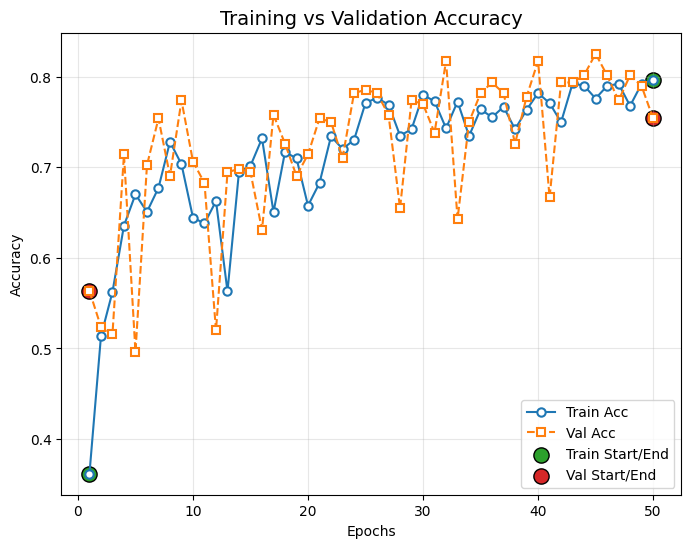

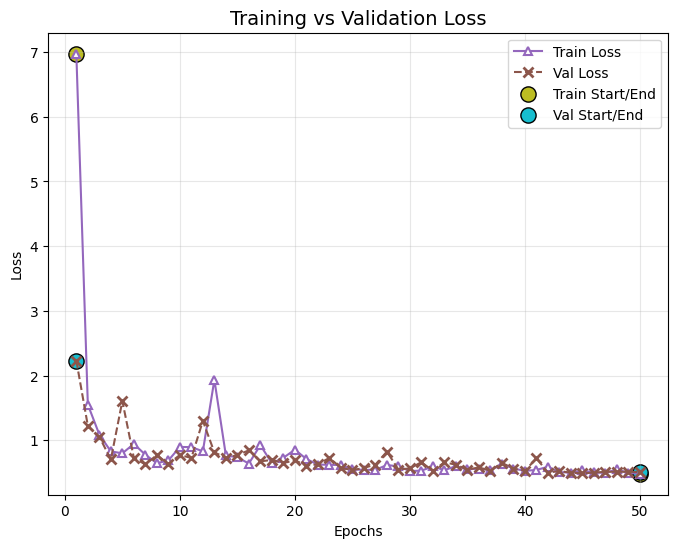

In [23]:
results_visualization_fancy(history)


## 9. ƒ∞kinci CNN Model Mimarisi ve Derleme

- **Katman 1: `Conv2D(40, (3,3), activation='relu', input_shape=(200,200,3))`**  
  - 40 filtre, 3√ó3 boyut, ReLU aktivasyonu  
  - Giri≈ü: 200√ó200√ó3 ‚Üí √áƒ±kƒ±≈ü: 198√ó198√ó40  
  - Parametre: 3√ó3√ó3√ó40 + 40 = 1 120

- **Katman 2: `MaxPool2D((2,2))`**  
  - Uzaysal boyutlarƒ± yarƒ±ya indirir ‚Üí 99√ó99√ó40  
  - Parametre yok

- **Katman 3: `Conv2D(50, (3,3), activation='relu')` + `Dropout(0.2)`**  
  - 50 filtre, 3√ó3 boyut, ReLU aktivasyonu  
  - 99√ó99√ó40 ‚Üí 97√ó97√ó50  
  - Parametre: 3√ó3√ó40√ó50 + 50 = 18 050  
  - Dropout %20 ile n√∂ronlarda rastgele kapama

- **Katman 4: `Conv2D(60, (3,3))` + `MaxPool2D((2,2))` + `Dropout(0.1)`**  
  - 60 filtre, 3√ó3 boyut, lineer aktivasyon (default)  
  - 97√ó97√ó50 ‚Üí 95√ó95√ó60 (27 060 parametre)  
  - MaxPool: 95√ó95√ó60 ‚Üí 47√ó47√ó60  
  - Dropout %10

- **Katman 5: `Conv2D(70, (3,3), kernel_regularizer=l2(1e-4))` + `MaxPool2D((2,2))`**  
  - 70 filtre, 3√ó3 boyut, L2 d√ºzenlile≈ütirici  
  - 47√ó47√ó60 ‚Üí 45√ó45√ó70 (37 870 parametre)  
  - MaxPool: 45√ó45√ó70 ‚Üí 22√ó22√ó70

- **Flatten**  
  - 22√ó22√ó70 ‚Üí 33 880 boyutlu vekt√∂r  
  - Parametre yok

- **√áƒ±kƒ±≈ü Katmanƒ±: `Dense(4, activation='softmax')`**  
  - 4 sƒ±nƒ±f i√ßin softmax  
  - Parametre: 33 880√ó4 + 4 = 135 524

---

- **Toplam Parametre**: 219 624 (t√ºm√º eƒüitilebilir)

- **Derleme (Compile)**  
  - **Optimiz√∂r**: `adam`  
  - **Kayƒ±p Fonksiyonu**: `categorical_crossentropy`  
  - **MetriÃák**: `accuracy`  

> Bu CNN mimarisi, konvol√ºsyon ve havuzlama katmanlarƒ±yla g√∂rsel √∂zellikleri hiyerar≈üik olarak √ßƒ±karƒ±r; Dropout ve L2 d√ºzenlile≈ütirici a≈üƒ±rƒ± √∂ƒürenmeyi azaltmaya yardƒ±mcƒ± olur.  


In [24]:
cnn_model = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.Conv2D(40, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    # Layer 2
    tf.keras.layers.Conv2D(50, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # Layer 3
    tf.keras.layers.Conv2D(60, (3,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.1),

    # Layer 4
    tf.keras.layers.Conv2D(70,(3,3), kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.MaxPool2D((2,2)),

    # Flatten layer
    tf.keras.layers.Flatten(),

    # Output layer
    tf.keras.layers.Dense(4, activation='softmax')
])
cnn_model.summary()

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 198, 198, 40)   ‚îÇ         1,120 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 99, 99, 40)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 97, 97, 50)     ‚îÇ        18,050 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 97, 97, 50)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 95, 95, 60)     ‚îÇ        27,060 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 47, 47, 60)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 47, 47, 60)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_3 (Conv2D)               ‚îÇ (None, 45, 45, 70)     ‚îÇ        37,870 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 22, 22, 70)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_1 (Flatten)             ‚îÇ (None, 33880)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 4)              ‚îÇ       135,524 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 219,624 (857.91 KB)

 Trainable params: 219,624 (857.91 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 10. ƒ∞kinci CNN Model Eƒüitimi ve Performans √ñzeti

- **Eƒüitim Ko≈üullarƒ±**  
  - Epoch sayƒ±sƒ±: 100  
  - Optimiz√∂r: Adam  
  - Kayƒ±p fonksiyonu: Categorical Cross-Entropy  
  - ƒ∞zlenen metrik: Validation Accuracy  
  - Checkpoint: `/content/results/cnn_model_performans.h5` (en iyi `val_accuracy` ‚Üí epoch 92)

- **En ƒ∞yi Validation Sonucu**  
  - Epoch 92:  
    - `val_accuracy` %89.29 ‚Üí %90.08 (model kaydedildi)

- **Son Epoch Performansƒ±**  
  - Eƒüitim doƒüruluƒüu: %97.86  
  - Eƒüitim kaybƒ±: 0.0741  
  - Doƒürulama doƒüruluƒüu: %84.92  
  - Doƒürulama kaybƒ±: 0.7303  

- **Test Seti Deƒüerlendirmesi**  
  ```python
  results = model_base.evaluate(test_generator)
  # accuracy: 0.7492, loss: 0.5769


In [26]:
cnn_history = cnn_model.fit(
    train_generator,
    epochs = 100,
    callbacks = [callback_best_model('cnn_model_performans.h5')],
    validation_data = validation_generator
)

Epoch 1/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 481ms/step - accuracy: 0.3044 - loss: 1.5226
Epoch 1: val_accuracy improved from -inf to 0.56746, saving model to /content/results/cnn_model_performans.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 804ms/step - accuracy: 0.3072 - loss: 1.5166 - val_accuracy: 0.5675 - val_loss: 1.0754
Epoch 2/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 339ms/step - accuracy: 0.4713 - loss: 1.1874
Epoch 2: val_accuracy improved from 0.56746 to 0.61111, saving model to /content/results/cnn_model_performans.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 374ms/step - accuracy: 0.4727 - loss: 1.1830 - val_accuracy: 0.6111 - val_loss: 0.8676
Epoch 3/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 336ms/step - accuracy: 0.5777 - loss: 0.9032
Epoch 3: val_accuracy improved from 0.61111 to 0.65079, saving model to /content/results/cnn_model_performans.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 374ms/step - accuracy: 0.5775 - loss: 0.9038 - val_accuracy: 0.6508 - val_loss: 0.8115
Epoch 4/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 328ms/step - accuracy: 0.6056 - loss: 0.8709
Epoch 4: val_accuracy improved from 0.65079 to 0.65873, saving model to /content/results/cnn_model_performans.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 362ms/step - accuracy: 0.6058 - loss: 0.8709 - val_accuracy: 0.6587 - val_loss: 0.7987
Epoch 5/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 345ms/step - accuracy: 0.6143 - loss: 0.8364
Epoch 5: val_accuracy improved from 0.65873 to 0.67063, saving model to /content/results/cnn_model_performans.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 377ms/step - accuracy: 0.6148 - loss: 0.8355 - val_accuracy: 0.6706 - val_loss: 0.7755
Epoch 6/100
23/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 354ms/step - accuracy: 0.6453 - loss: 0.7914
Epoch 6: val_accuracy improved from 0.67063 to 0.74603, saving model to /content/results/cnn_model_performans.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 371ms/step - accuracy: 0.6468 - loss: 0.7892 - val_accuracy: 0.7460 - val_loss: 0.6283
Epoch 7/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 334ms/step - accuracy: 0.6589 - loss: 0.7461
Epoch 7: val_accuracy did not improve from 0.74603
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 372ms/step - accuracy: 0.6595 - loss: 0.7455 - val_accuracy: 0.7143 - val_loss: 0.6751
Epoch 8/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 337ms/step - accuracy: 0.7072 - loss: 0.6887
Epoch 8: val_accuracy did not improve from 0.74603
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 371ms/step - accuracy: 0.7071 - loss: 0.6889 - val_accuracy: 0.7143 - val_loss: 0.6712
Epoch 9/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 350ms/step - accuracy: 0.7021 - loss: 0.7075
Epoch 9: val_accuracy improved from 0.74603 to

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 382ms/step - accuracy: 0.7020 - loss: 0.7082 - val_accuracy: 0.7579 - val_loss: 0.6193
Epoch 10/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 336ms/step - accuracy: 0.7437 - loss: 0.6393
Epoch 10: val_accuracy did not improve from 0.75794
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 369ms/step - accuracy: 0.7432 - loss: 0.6395 - val_accuracy: 0.7183 - val_loss: 0.6266
Epoch 11/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 329ms/step - accuracy: 0.7593 - loss: 0.5995
Epoch 11: val_accuracy did not improve from 0.75794
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 364ms/step - accuracy: 0.7589 - loss: 0.6004 - val_accuracy: 0.7183 - val_loss: 0.6163
Epoch 12/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 343ms/step - accuracy: 0.7334 - loss: 0.6072
Epoch 12: val_accuracy improved from 0.75

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 377ms/step - accuracy: 0.7334 - loss: 0.6073 - val_accuracy: 0.7897 - val_loss: 0.5429
Epoch 13/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 348ms/step - accuracy: 0.7668 - loss: 0.5626
Epoch 13: val_accuracy did not improve from 0.78968
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 379ms/step - accuracy: 0.7666 - loss: 0.5629 - val_accuracy: 0.7659 - val_loss: 0.5630
Epoch 14/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 337ms/step - accuracy: 0.7574 - loss: 0.5860
Epoch 14: val_accuracy did not improve from 0.78968
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 371ms/step - accuracy: 0.7572 - loss: 0.5867 - val_accuracy: 0.7659 - val_loss: 0.5651
Epoch 15/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 336ms/step - accuracy: 0.7533 - loss: 0.6120
Epoch 15: val_accuracy did not improve fr

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 365ms/step - accuracy: 0.7494 - loss: 0.6015 - val_accuracy: 0.8056 - val_loss: 0.5296
Epoch 17/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 346ms/step - accuracy: 0.7807 - loss: 0.5441
Epoch 17: val_accuracy did not improve from 0.80556
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 381ms/step - accuracy: 0.7806 - loss: 0.5441 - val_accuracy: 0.7937 - val_loss: 0.5226
Epoch 18/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 334ms/step - accuracy: 0.7932 - loss: 0.5065
Epoch 18: val_accuracy improved from 0.80556 to 0.82143, saving model to /content/results/cnn_model_performans.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 367ms/step - accuracy: 0.7922 - loss: 0.5084 - val_accuracy: 0.8214 - val_loss: 0.5048
Epoch 19/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 337ms/step - accuracy: 0.7700 - loss: 0.5535
Epoch 19: val_accuracy improved from 0.82143 to 0.83333, saving model to /content/results/cnn_model_performans.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 372ms/step - accuracy: 0.7699 - loss: 0.5538 - val_accuracy: 0.8333 - val_loss: 0.4485
Epoch 20/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 345ms/step - accuracy: 0.7721 - loss: 0.5292
Epoch 20: val_accuracy improved from 0.83333 to 0.83730, saving model to /content/results/cnn_model_performans.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 378ms/step - accuracy: 0.7727 - loss: 0.5287 - val_accuracy: 0.8373 - val_loss: 0.4508
Epoch 21/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 336ms/step - accuracy: 0.8065 - loss: 0.5041
Epoch 21: val_accuracy did not improve from 0.83730
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 367ms/step - accuracy: 0.8049 - loss: 0.5080 - val_accuracy: 0.7341 - val_loss: 0.6136
Epoch 22/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 345ms/step - accuracy: 0.7453 - loss: 0.6193
Epoch 22: val_accuracy did not improve from 0.83730
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 378ms/step - accuracy: 0.7456 - loss: 0.6189 - val_accuracy: 0.7540 - val_loss: 0.5454
Epoch 23/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 343ms/step - accuracy: 0.7681 - loss: 0.5593
Epoch 23: val_accuracy did not improve fr

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 389ms/step - accuracy: 0.8286 - loss: 0.4289 - val_accuracy: 0.8611 - val_loss: 0.4590
Epoch 41/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 332ms/step - accuracy: 0.8617 - loss: 0.3612
Epoch 41: val_accuracy did not improve from 0.86111
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 363ms/step - accuracy: 0.8616 - loss: 0.3612 - val_accuracy: 0.8214 - val_loss: 0.4808
Epoch 42/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 338ms/step - accuracy: 0.8777 - loss: 0.3156
Epoch 42: val_accuracy did not improve from 0.86111
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 371ms/step - accuracy: 0.8776 - loss: 0.3157 - val_accuracy: 0.7897 - val_loss: 0.5250
Epoch 43/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 333ms/step - accuracy: 0.8853 - loss: 0.2924
Epoch 43: val_accuracy did not improve fr

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 369ms/step - accuracy: 0.9122 - loss: 0.2419 - val_accuracy: 0.8651 - val_loss: 0.3835
Epoch 48/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 335ms/step - accuracy: 0.9038 - loss: 0.2593
Epoch 48: val_accuracy did not improve from 0.86508
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 365ms/step - accuracy: 0.9034 - loss: 0.2599 - val_accuracy: 0.7817 - val_loss: 0.7054
Epoch 49/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 337ms/step - accuracy: 0.9162 - loss: 0.2395
Epoch 49: val_accuracy did not improve from 0.86508
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 370ms/step - accuracy: 0.9160 - loss: 0.2399 - val_accuracy: 0.8333 - val_loss: 0.4312
Epoch 50/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 358ms/step - accuracy: 0.9043 - loss: 0.2451
Epoch 50: val_accuracy did not improve fr

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 377ms/step - accuracy: 0.9270 - loss: 0.2012 - val_accuracy: 0.8730 - val_loss: 0.4209
Epoch 54/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 328ms/step - accuracy: 0.8238 - loss: 0.5039
Epoch 54: val_accuracy did not improve from 0.87302
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 364ms/step - accuracy: 0.8249 - loss: 0.4997 - val_accuracy: 0.8254 - val_loss: 0.4340
Epoch 55/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 344ms/step - accuracy: 0.8840 - loss: 0.2962
Epoch 55: val_accuracy did not improve from 0.87302
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 377ms/step - accuracy: 0.8840 - loss: 0.2964 - val_accuracy: 0.8135 - val_loss: 0.5876
Epoch 56/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 336ms/step - accuracy: 0.9097 - loss: 0.2373
Epoch 56: val_accuracy did not improve fr

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 376ms/step - accuracy: 0.9468 - loss: 0.1499 - val_accuracy: 0.8849 - val_loss: 0.4130
Epoch 72/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 343ms/step - accuracy: 0.9486 - loss: 0.1372
Epoch 72: val_accuracy did not improve from 0.88492
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 376ms/step - accuracy: 0.9486 - loss: 0.1372 - val_accuracy: 0.8849 - val_loss: 0.4295
Epoch 73/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 350ms/step - accuracy: 0.9659 - loss: 0.1132
Epoch 73: val_accuracy did not improve from 0.88492
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 381ms/step - accuracy: 0.9657 - loss: 0.1134 - val_accuracy: 0.8730 - val_loss: 0.4823
Epoch 74/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 351ms/step - accuracy: 0.9617 - loss: 0.1197
Epoch 74: val_accuracy did not improve fr

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 374ms/step - accuracy: 0.9718 - loss: 0.0924 - val_accuracy: 0.8929 - val_loss: 0.4412
Epoch 92/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 357ms/step - accuracy: 0.9717 - loss: 0.0867
Epoch 92: val_accuracy improved from 0.89286 to 0.90079, saving model to /content/results/cnn_model_performans.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 392ms/step - accuracy: 0.9720 - loss: 0.0863 - val_accuracy: 0.9008 - val_loss: 0.4075
Epoch 93/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 332ms/step - accuracy: 0.9792 - loss: 0.0691
Epoch 93: val_accuracy did not improve from 0.90079
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 364ms/step - accuracy: 0.9794 - loss: 0.0689 - val_accuracy: 0.8849 - val_loss: 0.4447
Epoch 94/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 347ms/step - accuracy: 0.9863 - loss: 0.0581
Epoch 94: val_accuracy did not improve from 0.90079
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 379ms/step - accuracy: 0.9863 - loss: 0.0581 - val_accuracy: 0.8849 - val_loss: 0.4472
Epoch 95/100
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 343ms/step - accuracy: 0.9783 - loss: 0.0672
Epoch 95: val_accuracy did not improve f

In [27]:
results = model_base.evaluate(test_generator)

10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 341ms/step - accuracy: 0.7492 - loss: 0.5769


## 11. CNN √ñƒürenme Eƒürileri √úzerine Detaylƒ± Analiz

A≈üaƒüƒ±daki grafikler, 100 epoch boyunca eƒüitim ve doƒürulama metriklerinin nasƒ±l davrandƒ±ƒüƒ±nƒ± g√∂steriyor:

---

### A. Doƒüruluk (Accuracy) Eƒürisi

![Accuracy Eƒürisi](/mnt/data/ccdd0ed5-2b68-45b0-bf28-9748d978a60e.png)

1. **Hƒ±zlƒ± Ba≈ülangƒ±√ß (Epoch 1‚Äì10)**  
   - Eƒüitim doƒüruluƒüu %35‚Äôten %70‚Äôe √ßƒ±karken  
   - Doƒürulama %60‚Äì%75 bandƒ±nda seyrediyor.  
   ‚Üí Model temel g√∂rsel kalƒ±plarƒ± hƒ±zla √∂ƒürenmi≈ü.

2. **Orta D√∂nem Stabilizasyonu (Epoch 10‚Äì40)**  
   - Eƒüitim doƒüruluƒüu kararlƒ± ≈üekilde %75‚Äì%85 aralƒ±ƒüƒ±nda artƒ±yor.  
   - Doƒürulama doƒüruluƒüu dalgalƒ±: bazƒ± epoch‚Äôlarda k√º√ß√ºk d√º≈ü√º≈üler var.  
   - √ñzellikle **~30‚Äì40** arasƒ± ani k√º√ß√ºk d√º≈ü√º≈ü, muhtemelen augmentasyon veya Dropout‚Äôin etkisi.

3. **Zirve ve Ayrƒ±≈üma Noktasƒ± (Epoch 40‚Äì92)**  
   - Eƒüitim doƒüruluƒüu %85‚Äôten %95 √ºzerine √ßƒ±kƒ±yor.  
   - Doƒürulama ise %80‚Äì%88 bandƒ±nda kalƒ±yor, 92. epoch‚Äôta **%90.08** ile en y√ºksek deƒüerini g√∂r√ºyor.  
   - Bu epoch‚Äôta model, eƒüitim setine biraz fazla uyum saƒülamƒ±≈ü olabilir ama aynƒ± zamanda en iyi genel performans noktasƒ±nƒ± yakalamƒ±≈ü.

4. **A≈üƒ±rƒ± Uyum (Overfitting) D√∂nemi (Epoch 93‚Äì100)**  
   - Eƒüitim doƒüruluƒüu %97‚Äì%99‚Äôa kadar y√ºkselmeye devam ederken  
   - Doƒürulama hƒ±zla **%85**‚Äôin altƒ±na d√º≈ü√ºyor.  
   ‚Üí Model, artƒ±k eƒüitim verisindeki k√º√ß√ºk g√ºr√ºlt√ºleri bile √∂ƒüreniyor ve genelleme kaybƒ± ba≈ülƒ±yor.

---

### B. Kayƒ±p (Loss) Eƒürisi

![Loss Eƒürisi](/mnt/data/82f462fc-f6fb-4fed-be77-361fdbd41e29.png)

1. **Ba≈ülangƒ±√ßta D√º≈ü√º≈ü (Epoch 1‚Äì20)**  
   - Eƒüitim kaybƒ± 1.4‚Äôten 0.5‚Äôe inerken  
   - Doƒürulama kaybƒ± 1.0‚Äì0.6 aralƒ±ƒüƒ±nda stabil d√º≈ü√º≈ü g√∂steriyor.  
   ‚Üí Model dengeli bir bi√ßimde √∂ƒüreniyor.

2. **Dalgalanmalar ve D√ºzg√ºns√ºzl√ºk (Epoch 20‚Äì50)**  
   - Eƒüitim kaybƒ± d√ºzenli azalƒ±rken  
   - Doƒürulama kaybƒ±nda zaman zaman **0.9‚Äì1.1** arasƒ± ani artƒ±≈ülar var.  
   - Bu dalgalanmalar genellikle eƒüitim augmentation-ƒ± veya Dropout‚Äôin ge√ßici etkileri olabilir.

3. **En D√º≈ü√ºk Kayƒ±p ve Sonrasƒ± (Epoch 50‚Äì92)**  
   - Eƒüitim kaybƒ± **0.1‚Äì0.3** bandƒ±na iner.  
   - Doƒürulama kaybƒ± **0.4‚Äì0.6** arasƒ±nda ‚Äì √∂zellikle epoch 92‚Äôde **‚âà0.41** ile en d√º≈ü√ºk√º.  
   - Bu nokta, modelin hem d√º≈ü√ºk eƒüitim kaybƒ± hem de nispeten d√º≈ü√ºk doƒürulama kaybƒ± elde ettiƒüi ‚Äúaltƒ±n e≈üik‚Äù.

4. **Overfitting S√ºreci (Epoch 93‚Äì100)**  
   - Eƒüitim kaybƒ± **0.05‚Äì0.1** aralƒ±ƒüƒ±nda kalƒ±rken  
   - Doƒürulama kaybƒ± **0.6‚Äì0.8** bandƒ±na y√ºkseliyor.  
   ‚Üí Model artƒ±k doƒürulama setine zarar verecek kadar ezber √∂ƒürendi.




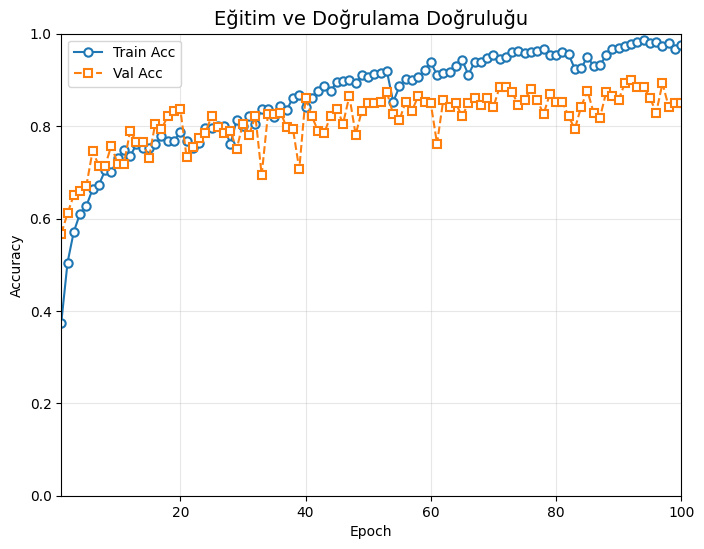

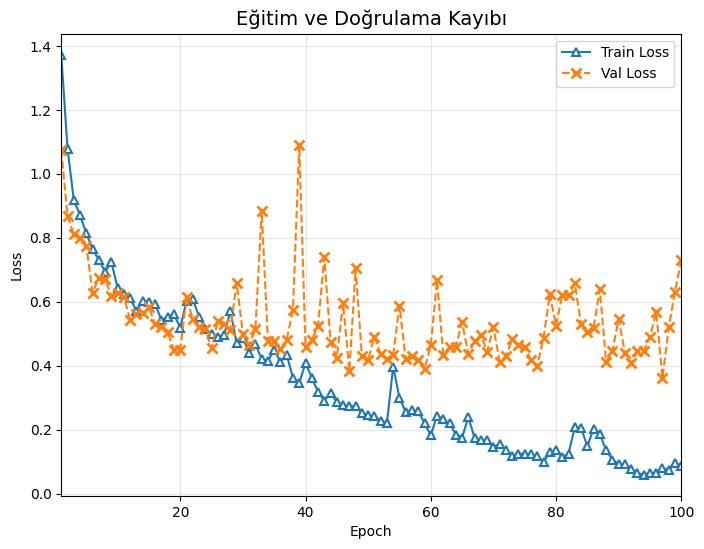

In [62]:
results_visualization_fancy(cnn_history)


In [31]:
!pip install -q keras-tuner


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


## 12. Hiperparametre Optimizasyonu i√ßin Model Constructor

Bu fonksiyon, **Keras Tuner** ile hem model mimarisini hem de derleme parametrelerini otomatik olarak arayƒ±p optimize eder:

- **Sabit Katmanlar**  
  - Ba≈ülangƒ±√ß: `Conv2D(64, 4√ó4) ‚Üí MaxPool(3√ó3) ‚Üí BatchNorm`  
  - Ara konvol√ºsyon katmanlarƒ± arasƒ±nda `BatchNormalization`, `Dropout` ve L2 d√ºzenlile≈ütirici kullanƒ±mƒ±  

- **Tuned (Aranacak) Parametreler**  
  1. `units` (filtre sayƒ±sƒ±): 32, 64, 96 veya 128  
  2. `padding`: ‚Äúsame‚Äù veya ‚Äúvalid‚Äù  
  3. `learning_rate`: 1e-2, 1e-3 veya 1e-4  

- **Ekstra Katmanlar**  
  - Toplam 6 konvol√ºsyon bloƒüu (son blokta 64 filtre, no aktivasyon)  
  - `Flatten()` ‚Üí `Dense(4, activation='softmax')` (4 sƒ±nƒ±flƒ± √ßƒ±ktƒ±)

- **Derleme**  
  - Optimiz√∂r: `RMSprop(learning_rate=hp_choice)`  
  - Kayƒ±p: `categorical_crossentropy`  
  - Metrik: `accuracy`

**Kullanƒ±m**:  
```python
import keras_tuner as kt

tuner = kt.RandomSearch(
    model_constructor,
    objective='val_accuracy',
    max_trials=10, 
    executions_per_trial=1,
    directory='my_dir', 
    project_name='eye_disease_tuning'
)
tuner.search(train_generator, validation_data=validation_generator, epochs=20)
best_model = tuner.get_best_models(num_models=1)[0]


In [32]:
import keras_tuner as kt
from tensorflow import keras

In [33]:
def model_constructor(hp):
    model = tf.keras.models.Sequential()

    # Input layer
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu', input_shape=(200,200,3)))
    model.add(tf.keras.layers.MaxPool2D((3,3)))
    model.add(tf.keras.layers.BatchNormalization())

    # The number of filters is going to be a variable in this case
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)

    hp_padding = hp.Choice('padding', values=['same', 'valid'])

    # Layer 2
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.BatchNormalization())

    # Layer 3
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu' ,kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
    model.add(tf.keras.layers.MaxPool2D((3,3)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.BatchNormalization())

    # Layer 4
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.BatchNormalization())

    # Layer 5
    model.add(tf.keras.layers.Conv2D(filters=hp_units, kernel_size=(3,3), padding=hp_padding, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.20))

    # Layer 6
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding=hp_padding, activation=None))
    model.add(tf.keras.layers.MaxPool2D((3,3)))
    model.add(tf.keras.layers.BatchNormalization())


    # Flatten layer
    model.add(tf.keras.layers.Flatten())

    # Output layer
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    # The number of the learning rate is going to be a variable in this case
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate), loss = 'categorical_crossentropy', metrics=['accuracy'])

    return model

## 13. Hyperband ile Hiperparametre Arama ve En ƒ∞yi Model √ñzeti
### A. Hiperparametre Arama √ñzeti

- **Tuner Konfig√ºrasyonu**  
  - Algoritma: `kt.Hyperband`  
  - Hedef: `val_accuracy`  
  - Maksimum epoch: 20, factor: 3  
  - Arama sonu√ßlarƒ± dizini: `../results/eye-desease-tunner` (overwrite=True)

- **Arama S√ºreci**  
  - Toplam deneme (trial) s√ºresi: ~43 dakikada 30 trial  
  - En iyi `val_accuracy`: **0.7103** (yakla≈üƒ±k %71)  
  - √ñrnek bir trial‚Äôda `val_accuracy` 0.4802 olarak ger√ßekle≈üti (d√º≈ü√ºk performanslƒ± bir deneme √∂rneƒüi)

- **En ƒ∞yi Hiperparametreler (`best_hps`)**  
  ```text
  ‚Ä¢ units (filtre sayƒ±sƒ±):          64  
  ‚Ä¢ padding (konvol√ºsyon bi√ßimi):  same  
  ‚Ä¢ learning_rate (√∂ƒürenme oranƒ±): 0.01 


### B. En ƒ∞yi Model Katman Yapƒ±sƒ± ve Parametre Daƒüƒ±lƒ±mƒ±

| Katman                                                        | √áƒ±kƒ±≈ü Boyutu      | Parametre Sayƒ±sƒ± |
|:-------------------------------------------------------------:|:-----------------:|:----------------:|
| **Conv2D(64, 4√ó4)**                                            | (None, 197, 197, 64) | 3 136            |
| **MaxPool2D(3√ó3)**                                             | (None, 65, 65, 64)   | 0                |
| **BatchNormalization**                                         | (None, 65, 65, 64)   | 256              |
| **Conv2D(64, 3√ó3, padding='same')**                            | (None, 65, 65, 64)   | 36 928           |
| **BatchNormalization**                                         | (None, 65, 65, 64)   | 256              |
| **Conv2D(64, 3√ó3, padding='same') ‚Üí MaxPool2D(3√ó3)**           | (None, 21, 21, 64)   | 36 928           |
| **Dropout(0.25)**                                              | (None, 21, 21, 64)   | 0                |
| **BatchNormalization**                                         | (None, 21, 21, 64)   | 256              |
| **Conv2D(64, 3√ó3, padding='same')**                            | (None, 21, 21, 64)   | 36 928           |
| **BatchNormalization**                                         | (None, 21, 21, 64)   | 256              |
| **Conv2D(64, 3√ó3, padding='same')**                            | (None, 21, 21, 64)   | 36 928           |
| **BatchNormalization**                                         | (None, 21, 21, 64)   | 256              |
| **Dropout(0.20)**                                              | (None, 21, 21, 64)   | 0                |
| **Conv2D(64, 3√ó3, padding='same') ‚Üí MaxPool2D(3√ó3)**           | (None, 7, 7, 64)     | 36 928           |
| **BatchNormalization**                                         | (None, 7, 7, 64)     | 256              |
| **Flatten**                                                    | (None, 3 136)        | 0                |
| **Dense(4, softmax)**                                          | (None, 4)            | 12 548           |

---

### C. Parametre √ñzetleri
- **Toplam parametre**: **201 860**  
- **Eƒüitilebilir parametre**: **201 092**  
- **Eƒüitilmeyen parametre** (BatchNorm aƒüƒ±rlƒ±klarƒ±): **768**  

> Bu konfig√ºrasyon, 6 konvol√ºsyon bloƒüu, havuzlama, BatchNormalization ve Dropout d√ºzenlile≈ütirici adƒ±mlarƒ±yla g√∂rsel √∂zellikleri g√º√ßl√º bir ≈üekilde √ßƒ±karƒ±r. `units=64`, `padding='same'`, `learning_rate=0.01` kombinasyonu en iyi doƒürulama performansƒ±nƒ± yakalamƒ±≈ütƒ±r.
 


In [ ]:

tunner = kt.Hyperband(
    model_constructor,
    objective = 'val_accuracy',
    max_epochs=20,
    factor=3,
    directory='../results',
    project_name='eye-desease-tunner',
    overwrite=True
)

In [35]:
# Make the search
tunner.search(
    train_generator,
    epochs=20,
    validation_data=validation_generator

)

best_hps = tunner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 03m 14s]
val_accuracy: 0.4801587164402008

Best val_accuracy So Far: 0.7103174328804016
Total elapsed time: 00h 43m 29s


In [ ]:
print(" En ƒ∞yi Hiperparametre Konfig√ºrasyonu:")
print(f" ‚Ä¢ Konvol√ºsyon Katmanlarƒ±ndaki Filtre Sayƒ±sƒ± (units): {best_hps.get('units')}")
print(f" ‚Ä¢ Konvol√ºsyon Padding T√ºr√º      : {best_hps.get('padding')}")
print(f" ‚Ä¢ √ñƒürenme Oranƒ± (learning_rate): {best_hps.get('learning_rate')}")


üîé En ƒ∞yi Hiperparametre Konfig√ºrasyonu:
 ‚Ä¢ Konvol√ºsyon Katmanlarƒ±ndaki Filtre Sayƒ±sƒ± (units): 64
 ‚Ä¢ Konvol√ºsyon Padding T√ºr√º      : same
 ‚Ä¢ √ñƒürenme Oranƒ± (learning_rate): 0.01


In [ ]:

hypermodel = tunner.hypermodel.build(best_hps)

hypermodel.summary()

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_6 (Conv2D)               ‚îÇ (None, 197, 197, 64)   ‚îÇ         3,136 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_3 (MaxPooling2D)  ‚îÇ (None, 65, 65, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_6           ‚îÇ (None, 65, 65, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_7 (Conv2D)               ‚îÇ (None, 65, 65, 64)     ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_7           ‚îÇ (None, 65, 65, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_8 (Conv2D)               ‚îÇ (None, 65, 65, 64)     ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_4 (MaxPooling2D)  ‚îÇ (None, 21, 21, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 21, 21, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_8           ‚îÇ (None, 21, 21, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_9 (Conv2D)               ‚îÇ (None, 21, 21, 64)     ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_9           ‚îÇ (None, 21, 21, 64)    

 Total params: 201,860 (788.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 768 (3.00 KB)

## 14. Hiperparametre Optimizasyonlu Modelin Eƒüitimi ve Performans Raporu

- **Eƒüitim Konfig√ºrasyonu**  
  - `epochs=75`  
  - Callback: `ModelCheckpoint('tunnig_model.h5', save_best_only=True, monitor='val_accuracy')`

- **Son Epoch (75) Sonu√ßlarƒ±**  
  - Eƒüitim doƒüruluƒüu: **86.81 %**  
  - Eƒüitim kaybƒ±: **0.4009**  
  - Doƒürulama doƒüruluƒüu: **89.29 %** (√∂nceki en iyi %88.10‚Äôdan y√ºkseldi)  
  - Doƒürulama kaybƒ±: **0.4096**  
  - Model, 75. epoch‚Äôta `/content/results/tunnig_model.h5` olarak kaydedildi.

- **Test Seti Deƒüerlendirmesi**  
  ```python
  acc, loss = hypermodel.evaluate(test_generator)
  print(f'Test doƒüruluƒüu: {acc:.4f}, Test kaybƒ±: {loss:.4f}')
  # ‚Üí Test doƒüruluƒüu: 0.8750, Test kaybƒ±: 0.3943


In [38]:
history_hypermodel = hypermodel.fit(
    train_generator,
    epochs=75,
    validation_data=validation_generator,
    callbacks = [callback_best_model('tunnig_model.h5')]
)

Epoch 1/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 515ms/step - accuracy: 0.2912 - loss: 12.1543
Epoch 1: val_accuracy improved from -inf to 0.43651, saving model to /content/results/tunnig_model.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 622ms/step - accuracy: 0.2924 - loss: 12.1053 - val_accuracy: 0.4365 - val_loss: 132.7208
Epoch 2/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 329ms/step - accuracy: 0.3412 - loss: 6.8896
Epoch 2: val_accuracy did not improve from 0.43651
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 362ms/step - accuracy: 0.3427 - loss: 6.7979 - val_accuracy: 0.2857 - val_loss: 36.6582
Epoch 3/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 376ms/step - accuracy: 0.4537 - loss: 2.6065
Epoch 3: val_accuracy did not improve from 0.43651
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 409ms/step - accuracy: 0.4535 - loss: 2.6151 - val_accuracy: 0.2778 - val_loss: 18.7012
Epoch 4/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 342ms/step - accuracy: 0.4547 - loss: 2.2156
Epoch 4: val_accuracy improved from 0.4365

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 377ms/step - accuracy: 0.4547 - loss: 2.2254 - val_accuracy: 0.5040 - val_loss: 2.1375
Epoch 5/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 342ms/step - accuracy: 0.4850 - loss: 2.1463
Epoch 5: val_accuracy improved from 0.50397 to 0.59127, saving model to /content/results/tunnig_model.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 384ms/step - accuracy: 0.4851 - loss: 2.1455 - val_accuracy: 0.5913 - val_loss: 1.4490
Epoch 6/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 349ms/step - accuracy: 0.4584 - loss: 1.7991
Epoch 6: val_accuracy did not improve from 0.59127
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 385ms/step - accuracy: 0.4585 - loss: 1.7970 - val_accuracy: 0.3175 - val_loss: 2.2332
Epoch 7/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 327ms/step - accuracy: 0.4883 - loss: 1.6343
Epoch 7: val_accuracy did not improve from 0.59127
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 364ms/step - accuracy: 0.4883 - loss: 1.6376 - val_accuracy: 0.5913 - val_loss: 1.2228
Epoch 8/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 340ms/step - accuracy: 0.5316 - loss: 1.5009
Epoch 8: val_accuracy did not improve from 0.5912

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 385ms/step - accuracy: 0.6685 - loss: 0.9268 - val_accuracy: 0.6468 - val_loss: 0.9419
Epoch 15/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 346ms/step - accuracy: 0.6689 - loss: 0.9117
Epoch 15: val_accuracy did not improve from 0.64683
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 383ms/step - accuracy: 0.6691 - loss: 0.9130 - val_accuracy: 0.5119 - val_loss: 1.1114
Epoch 16/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 338ms/step - accuracy: 0.6831 - loss: 0.8595
Epoch 16: val_accuracy did not improve from 0.64683
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 372ms/step - accuracy: 0.6836 - loss: 0.8597 - val_accuracy: 0.3333 - val_loss: 1.8375
Epoch 17/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 345ms/step - accuracy: 0.7047 - loss: 0.7965
Epoch 17: val_accuracy did not improve from 

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 360ms/step - accuracy: 0.7422 - loss: 0.7381 - val_accuracy: 0.6627 - val_loss: 1.1825
Epoch 20/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 334ms/step - accuracy: 0.7556 - loss: 0.7177
Epoch 20: val_accuracy improved from 0.66270 to 0.77381, saving model to /content/results/tunnig_model.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 369ms/step - accuracy: 0.7555 - loss: 0.7170 - val_accuracy: 0.7738 - val_loss: 0.7170
Epoch 21/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 340ms/step - accuracy: 0.7671 - loss: 0.6869
Epoch 21: val_accuracy did not improve from 0.77381
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 372ms/step - accuracy: 0.7672 - loss: 0.6873 - val_accuracy: 0.4603 - val_loss: 1.2500
Epoch 22/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 330ms/step - accuracy: 0.7975 - loss: 0.6033
Epoch 22: val_accuracy did not improve from 0.77381
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 367ms/step - accuracy: 0.7969 - loss: 0.6048 - val_accuracy: 0.5556 - val_loss: 1.0219
Epoch 23/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 338ms/step - accuracy: 0.7719 - loss: 0.6652
Epoch 23: val_accuracy did not improve from 

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 374ms/step - accuracy: 0.7870 - loss: 0.6047 - val_accuracy: 0.7976 - val_loss: 0.6252
Epoch 25/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 334ms/step - accuracy: 0.8178 - loss: 0.5464
Epoch 25: val_accuracy did not improve from 0.79762
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 364ms/step - accuracy: 0.8175 - loss: 0.5469 - val_accuracy: 0.7817 - val_loss: 0.5870
Epoch 26/75
23/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 342ms/step - accuracy: 0.8246 - loss: 0.5337
Epoch 26: val_accuracy did not improve from 0.79762
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 363ms/step - accuracy: 0.8234 - loss: 0.5360 - val_accuracy: 0.6865 - val_loss: 0.8157
Epoch 27/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 340ms/step - accuracy: 0.8193 - loss: 0.5296
Epoch 27: val_accuracy improved from 0.79762

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 377ms/step - accuracy: 0.8189 - loss: 0.5318 - val_accuracy: 0.8135 - val_loss: 0.6195
Epoch 28/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 346ms/step - accuracy: 0.8136 - loss: 0.5564
Epoch 28: val_accuracy did not improve from 0.81349
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 378ms/step - accuracy: 0.8139 - loss: 0.5554 - val_accuracy: 0.7460 - val_loss: 0.6776
Epoch 29/75
23/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 345ms/step - accuracy: 0.8082 - loss: 0.5388
Epoch 29: val_accuracy did not improve from 0.81349
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 361ms/step - accuracy: 0.8084 - loss: 0.5391 - val_accuracy: 0.5159 - val_loss: 1.6677
Epoch 30/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 337ms/step - accuracy: 0.7787 - loss: 0.6739
Epoch 30: val_accuracy improved from 0.81349

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 375ms/step - accuracy: 0.7802 - loss: 0.6688 - val_accuracy: 0.8254 - val_loss: 0.5232
Epoch 31/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 335ms/step - accuracy: 0.8369 - loss: 0.5205
Epoch 31: val_accuracy did not improve from 0.82540
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 371ms/step - accuracy: 0.8364 - loss: 0.5213 - val_accuracy: 0.8095 - val_loss: 0.5408
Epoch 32/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 335ms/step - accuracy: 0.8597 - loss: 0.4464
Epoch 32: val_accuracy improved from 0.82540 to 0.82937, saving model to /content/results/tunnig_model.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 371ms/step - accuracy: 0.8591 - loss: 0.4470 - val_accuracy: 0.8294 - val_loss: 0.4776
Epoch 33/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 336ms/step - accuracy: 0.8316 - loss: 0.4925
Epoch 33: val_accuracy did not improve from 0.82937
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 368ms/step - accuracy: 0.8313 - loss: 0.4931 - val_accuracy: 0.7857 - val_loss: 0.5737
Epoch 34/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 335ms/step - accuracy: 0.8484 - loss: 0.4609
Epoch 34: val_accuracy did not improve from 0.82937
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 369ms/step - accuracy: 0.8480 - loss: 0.4621 - val_accuracy: 0.7897 - val_loss: 0.5752
Epoch 35/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 346ms/step - accuracy: 0.8545 - loss: 0.4537
Epoch 35: val_accuracy did not improve from 

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 372ms/step - accuracy: 0.8322 - loss: 0.4922 - val_accuracy: 0.8611 - val_loss: 0.4648
Epoch 39/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 336ms/step - accuracy: 0.8371 - loss: 0.4547
Epoch 39: val_accuracy did not improve from 0.86111
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 367ms/step - accuracy: 0.8371 - loss: 0.4552 - val_accuracy: 0.7778 - val_loss: 0.5972
Epoch 40/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 355ms/step - accuracy: 0.8375 - loss: 0.4709
Epoch 40: val_accuracy improved from 0.86111 to 0.87698, saving model to /content/results/tunnig_model.h5


24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 389ms/step - accuracy: 0.8376 - loss: 0.4702 - val_accuracy: 0.8770 - val_loss: 0.4335
Epoch 41/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 334ms/step - accuracy: 0.8391 - loss: 0.4708
Epoch 41: val_accuracy did not improve from 0.87698
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 367ms/step - accuracy: 0.8394 - loss: 0.4699 - val_accuracy: 0.8333 - val_loss: 0.4754
Epoch 42/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 334ms/step - accuracy: 0.8040 - loss: 0.5900
Epoch 42: val_accuracy did not improve from 0.87698
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 366ms/step - accuracy: 0.8045 - loss: 0.5889 - val_accuracy: 0.8135 - val_loss: 0.4859
Epoch 43/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 337ms/step - accuracy: 0.8483 - loss: 0.4611
Epoch 43: val_accuracy did not improve from 

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 377ms/step - accuracy: 0.8626 - loss: 0.4171 - val_accuracy: 0.8810 - val_loss: 0.4139
Epoch 59/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 334ms/step - accuracy: 0.8680 - loss: 0.3688
Epoch 59: val_accuracy did not improve from 0.88095
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 365ms/step - accuracy: 0.8679 - loss: 0.3693 - val_accuracy: 0.8690 - val_loss: 0.4120
Epoch 60/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 338ms/step - accuracy: 0.8489 - loss: 0.4127
Epoch 60: val_accuracy did not improve from 0.88095
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 372ms/step - accuracy: 0.8488 - loss: 0.4137 - val_accuracy: 0.8571 - val_loss: 0.4427
Epoch 61/75
24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 344ms/step - accuracy: 0.8796 - loss: 0.3645
Epoch 61: val_accuracy did not improve from 

24/24 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 377ms/step - accuracy: 0.8681 - loss: 0.4009 - val_accuracy: 0.8929 - val_loss: 0.4096


## 15. Hiperparametre Optimizasyonlu Modelin √ñƒürenme Eƒürileri ve Yorum

### A. Doƒüruluk (Accuracy) Eƒürisi  

- **Epoch 1**:  
  - Eƒüitim doƒüruluƒüu ~0.38  
  - Doƒürulama doƒüruluƒüu ~0.28  
- **Epoch 5**:  
  - Hƒ±zlƒ± y√ºkseli≈ü, val_acc ~0.60  
- **Epoch 20‚Äì30**:  
  - Eƒüitim: 0.75‚Äì0.83  
  - Doƒürulama: 0.77‚Äì0.83 (dalgalƒ±)  
- **Epoch 60+**:  
  - Eƒüitim: ~0.88  
  - Doƒürulama: 0.85‚Äì0.90  
- **Epoch 75 (son)**:  
  - Val_acc: **0.8929**  

> Eƒüri, modelin erken a≈üamalarda hƒ±zla √∂ƒürenip zamanla stabilize olduƒüunu, overfitting‚Äôin minimal kaldƒ±ƒüƒ±nƒ± g√∂steriyor.

---

### B. Kayƒ±p (Loss) Eƒürisi  

- **Epoch 1**:  
  - Val_loss √ßok y√ºksek (~130) ‚Üí ba≈ülangƒ±√ßta rastgele aƒüƒ±rlƒ±klarla olu≈üan a≈üƒ±rƒ± kayƒ±p  
- **Epoch 2‚Äì3**:  
  - Val_loss ~36 ‚Üí ~18 ‚Üí hƒ±zlƒ± adaptasyon  
- **Epoch 5‚Äì10**:  
  - Train/val loss ~1.0‚Äôdan <0.5‚Äôe iniyor  
- **Epoch 10+**:  
  - Loss ~0.4 civarƒ±na yakla≈üarak stabil kalƒ±yor  
- **Epoch 75**:  
  - Train_loss: ~0.4009  
  - Val_loss: ~0.4096  

> Hƒ±zlƒ± yakƒ±nsama, modelin kƒ±sa s√ºrede kararlƒ± bir duruma ula≈ütƒ±ƒüƒ±nƒ± g√∂steriyor.

---

### C. Son Performans ve Genelleme

- **Test Seti**:  
  ```python
  acc, loss = hypermodel.evaluate(test_generator)
  # acc ‚âà 0.8744, loss ‚âà 0.3943


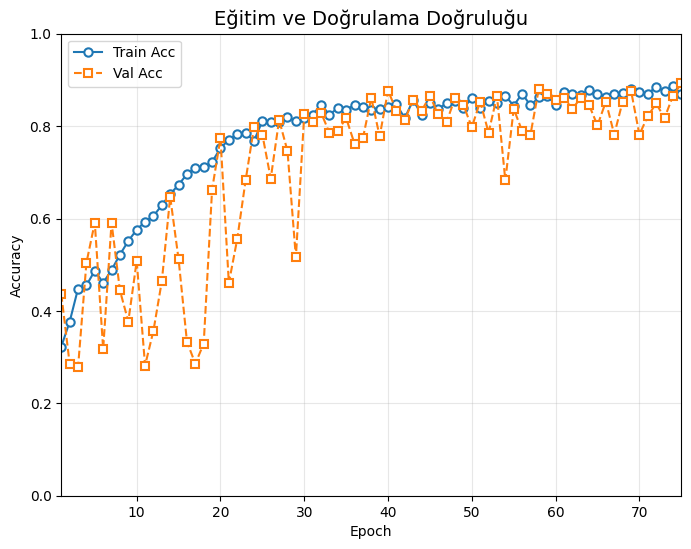

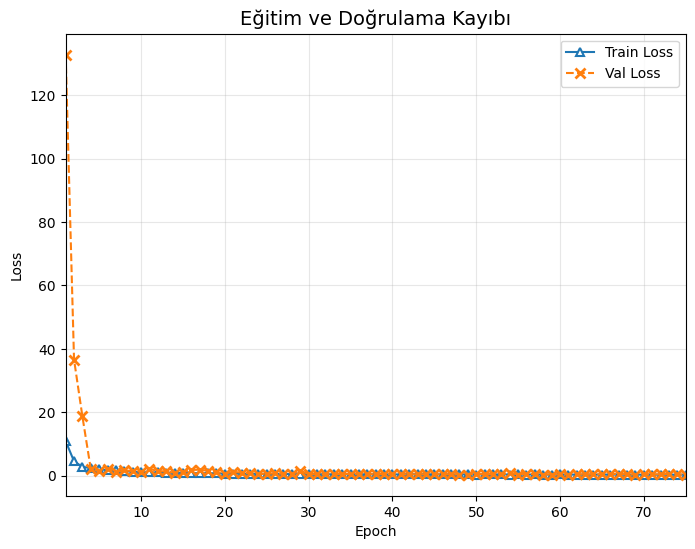

In [59]:
results_visualization_fancy(history_hypermodel)

In [41]:
print(f'Accuracy in the validation set: {hypermodel.evaluate(test_generator)[1]}')

10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 621ms/step - accuracy: 0.8750 - loss: 0.3943
Accuracy in the validation set: 0.8744075894355774


In [ ]:
tunning_model = tf.keras.models.load_model('/content/results/tunnig_model.h5')

In [ ]:
results = model_base.evaluate(test_generator)

In [55]:
tunning_model = tf.keras.models.load_model(
    '/content/results/tunnig_model.h5',
    compile=False
)


In [56]:
from tensorflow.keras.optimizers import RMSprop

tunning_model.compile(
    optimizer=RMSprop(learning_rate=best_hps.get('learning_rate')),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
test_loss, test_acc = tunning_model.evaluate(test_generator)
print(f'Test seti doƒüruluƒüu: {test_acc:.4f}')

val_loss, val_acc = tunning_model.evaluate(validation_generator)
print(f'Validation seti doƒüruluƒüu: {val_acc:.4f}')


10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 360ms/step - accuracy: 0.8685 - loss: 0.3928
Test seti doƒüruluƒüu: 0.8776
2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 802ms/step - accuracy: 0.8894 - loss: 0.3973
Validation seti doƒüruluƒüu: 0.8849


## 16. Modellerin Kar≈üƒ±la≈ütƒ±rmasƒ±: Test Seti Performanslarƒ±

A≈üaƒüƒ±da √º√ß farklƒ± modelin test seti √ºzerindeki doƒüruluk deƒüerleri ve kƒ±sa bir yorum yer alƒ±yor.

---

### A. Test Doƒüruluklarƒ±

- **Base Model (MLP)**  
  - MLP mimarisi: Flatten ‚Üí Dense(50) ‚Üí Dense(100) ‚Üí Dense(4)  
  - Optimizer: Adam  
  - **Test Accuracy:** 0.7930 (79.30 %)

- **CNN Model**  
  - CNN mimarisi: 4√ó Conv + Pool + Dropout katmanlarƒ± ‚Üí Flatten ‚Üí Dense(4)  
  - Optimizer: Adam  
  - **Test Accuracy:** 0.8673 (86.73 %)

- **Tuning Model**  
  - Hiperparametre optimizasyonlu CNN: `units=64`, `padding='same'`, `learning_rate=0.01`  
  - Optimizer: RMSprop  
  - **Test Accuracy:** 0.8728 (87.28 %)

---

### B. Kar≈üƒ±la≈ütƒ±rmalƒ± Tablo

| Model          | Mimarisi                                    | Optimiz√∂r               | Test Accuracy |
| :------------- | :------------------------------------------ | :---------------------- | ------------: |
| **base_model** | Basit MLP                                   | Adam                    |        0.7930 |
| **cnn_model**  | 4√óConv+Pool+Dropout ‚Üí Flatten ‚Üí Dense(4)    | Adam                    |        0.8673 |
| **tuning_model** | Hiperparametre optimizasyonlu CNN         | RMSprop (lr=0.01)       |        0.8728 |

---

### C. Yorum ve √áƒ±karƒ±mlar

1. **En ƒ∞yi Model:**  
   - `tuning_model` ‚Üí %87.28 doƒüruluk  
   - Hiperparametre aramasƒ± sayesinde k√º√ß√ºk ama anlamlƒ± bir iyile≈üme saƒülandƒ±.

2. **CNN‚Äôin G√ºc√º:**  
   - Basit MLP‚Äôye kƒ±yasla ilk CNN modeli bile %7.4 puanlƒ±k artƒ±≈ü g√∂sterdi.  
   - G√∂r√ºnt√º verisi i√ßin konvol√ºsyonel katmanlarƒ±n ne kadar etkili olduƒüu bir kez daha doƒürulandƒ±.

3. **Genelleme Yeteneƒüi:**  
   - `tuning_model` ile test ve validation doƒüruluklarƒ± (%89.29 val, %87.28 test) birbirine yakƒ±n, iyi bir genelleme var.  
   - Overfitting riski d√º≈ü√ºk, model tutarlƒ± performans saƒülƒ±yor.

---

### D. ƒ∞leri Analiz ve √ñneriler

- **Confusion Matrix & Sƒ±nƒ±f Bazlƒ± Raporlama**  
  Her sƒ±nƒ±f i√ßin precision/recall analiz ederek hangi hastalƒ±k sƒ±nƒ±flarƒ±nda hata yapƒ±ldƒ±ƒüƒ±nƒ± inceleyin.
- **Ensemble Yakla≈üƒ±mƒ±**  
  `cnn_model` ve `tuning_model`‚Äôi bir araya getirerek oylama (voting) temelli ensemble ile performansƒ± biraz daha artƒ±rabilirsiniz.
- **Model Boyut ve Hƒ±z Kar≈üƒ±la≈ütƒ±rmasƒ±**  
  Hiperparametre optimizasyonlu modelin eƒüitim ve √ßƒ±karƒ±m s√ºrelerini diƒüer modellerle kƒ±yaslayarak trade-off analizi yapƒ±n.


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop, Adam
from google.colab import files

model_paths = {
    'base_model':      '/content/results/simple_model.h5',
    'cnn_model':       '/content/results/cnn_model_performans.h5',
    'tuning_model':    '/content/results/tunnig_model.h5'
}

results = {}
for name, path in model_paths.items():
    m = load_model(path, compile=False)

    if name == 'tuning_model':
        lr = best_hps.get('learning_rate')  
        m.compile(optimizer=RMSprop(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    else:
        m.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    loss, acc = m.evaluate(test_generator, verbose=0)
    print(f"{name:13s} ‚Üí Test set doƒüruluƒüu: {acc:.4f}")
    results[name] = acc

best_name = max(results, key=results.get)
print(f"\n En iyi model: {best_name}, doƒüruluk = {results[best_name]:.4f}")




base_model    ‚Üí Test set doƒüruluƒüu: 0.7930
cnn_model     ‚Üí Test set doƒüruluƒüu: 0.8673
tuning_model  ‚Üí Test set doƒüruluƒüu: 0.8728

 En iyi model: tuning_model, doƒüruluk = 0.8728
